## 3 body equilibrium
In the following, A and C represent two different ligands and B represents a bivalent protein. The two binary dissociation constants are denoted K_AB and K_BC which represent the binding equilibrium when the other ligand is not bound to the protein. The three body cooperativity is modelling by the dimensionless parameter, alpha. If the interaction between B-C is independent of the A-B binding (and visa versa) the system is non-cooperative corresponding to alpha=1. Positive cooperativity (e.g. as typical for allostery) is represented by alpha>1, negative by 0<alpha<1. Notation and modeling approach adapted from "A comprehensive Mathematical Model for Three-Body Binding Equilibria", E.F Douglass et. al., JACS 2013, 6092-6099. In essence,
A + B <-> AB (K_AB),  B+ C <-> BC  (K_BC), A+ BC <-> ABC (K_AB/alpha) , AB + C <-> ABC (K_BC/alpha)

In [1]:
import sys
import os
sys.path.append('/novo/users/{}/jupyter.notebooks/temporary/NIKU/'.format(os.environ.get('USER')))
from cellmodel import CellModel as CellModel
import numpy as np
import matplotlib.pyplot as plt
from parameters_df import *

In [2]:
def binary_complex(atot,btot,k):
    q=atot+btot+k
    return 0.5*(q-np.sqrt(q*q-4*atot*btot))

def get_k(ab,atot):
    return ab+atot/ab-(1+atot)

In [3]:
mycell=CellModel()

In [4]:
myparameters=Parameters()

In [5]:
myparameters.my_param

,value,comment
r_cell,1.000000e+04,Cell radius in nm
b,1.000000e+01,Surface thickness in nm
K_RL,1.000000e+01,"Dissociation constant (nM) of poor, in-active ..."
K_GRL,1.000000e-01,Dissociation constant (nM) of active binder: G...
fraction,1.000000e-01,Fraction of active receptors
r_tube,1.000000e+02,Tube radius (nM) Intercellular distance/2
v,0.000000e+00,Advective flow velocity (nm/sec). Used to be 1...
D,1.000000e+07,Ligand diffusion (nm^2/s)
decay,1.925409e-05,Interstititum clearence rate (/sec). Default c...
clearance_rate,1.925409e-04,Receptor mediated clearance rate (/sec). Defau...


In [6]:
myparameters.calc_dict

{'Rtot': {'value': 2396.0776682484843,
  'comment': 'Total density of receptors (nM)'},
 'k_d_poor': {'value': None,
  'comment': 'Dissociation rate of receptor-inactive ligand binding (/sec)'},
 'k_a': {'value': 0.0009627044174443685,
  'comment': 'Association rate for receptor-ligand binding (/(sec*nM)). Assumed the same for both active and inactive receptor'},
 'K_RL_clearance': {'value': 10.200000000000001,
  'comment': 'Effective dissocation constant for receptor-inactive ligand binding, R+L <-> RL (nM), shifted due to clearance.'},
 'K_GR': {'value': 213490.52024093995,
  'comment': 'Dissociation constant for R <-> GR'},
 'cooperativity': {'value': 100.0,
  'comment': 'Cooperativity of GR-> GRL (RL -> GRL) compared to R->RL (R -> GR)'},
 'Gtot': {'value': 23960.776682484844,
  'comment': 'Total concentration of available G-proteins'}}

In [6]:
mycell=CellModel()
mycell.set(myparameters)

In [8]:
mycell.Rtot
mycell.Gtot

23960.776682484844

In [3]:
mycell=CellModel()
mycell.Gtot=10
mycell.K_GR=89.1
mycell.K_RL=10/2300  # receptor concentration is 2300 nM
mycell.alpha=100
log_space=np.linspace(-10,6,100)
ltot=np.exp(log_space)
grl=np.zeros(len(ltot))
equil=np.zeros((len(ltot),len(mycell.molecule_enum)))
xlast=None
for i in range(0,len(ltot)):
    mycell.Ltot=ltot[i]
    equil[i,:]=mycell.get_eq(xlast)
    xlast=equil[i,:]
    

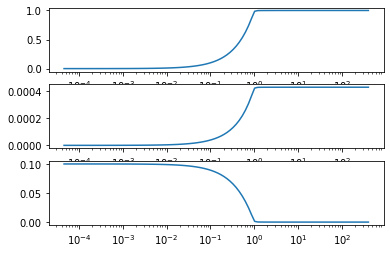

In [5]:
plt.subplot(3,1,1)
plt.plot(ltot,equil[:,mycell.molecule_enum['GRL']])
plt.xscale('log')
plt.subplot(3,1,2)
plt.plot(ltot,equil[:,mycell.molecule_enum['RL']])
plt.xscale('log')
plt.subplot(3,1,3)
plt.plot(ltot,equil[:,mycell.molecule_enum['GR']])
plt.xscale('log')
plt.show()

In [77]:
rtot_x

array([1.e-02, 5.e-02, 1.e-01, 5.e-01, 1.e+00, 5.e+00, 1.e+01, 5.e+01,
       1.e+02])

In [95]:
mycell.rtot

1

In [78]:
mycell.get_constraints(equil[0,:])

array([ 0.00000000e+00, -9.99900000e+01,  0.00000000e+00,  2.09414344e-12,
        2.09414344e-12,  6.78263522e-12])

In [26]:
s=2.3

In [28]:
print(type(s))

<class 'float'>


In [9]:
for i in range(10,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1


In [1]:
import numpy as np

In [2]:
l=np.array([1,2,3,4])

In [3]:
l.index(2)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [13]:
v,=np.where(l==0)

In [16]:
len(v)

0